In [30]:
# importando bibliotecas

from gurobipy import GRB, Model, quicksum
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# criando os dados

# vértices
N = 21

# coordenadas
np.random.seed(1)
X = list(np.random.random(N) * 100)
Y = list(np.random.random(N) * 100)

# demandas
demanda = list(np.random.randint(low=10, high=50, size=N))

In [32]:
Color = { 
    0 : 'blue',
    1 : 'orange',
    2 : 'green',
    3 : 'red',
    4 : 'purple',
    5 : 'brown',
    6 : 'pink',
    7 : 'gray',
    8 : 'olive',
    9 : 'cyan',
    10 : 'yellow',
    11 : 'violet',
    12 : 'lime',
    13 : 'azure',
    14 : 'gold',
    15 : 'tan'
}

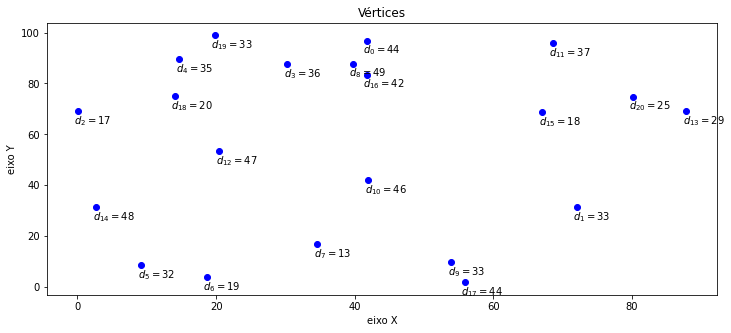

In [33]:
# gráfico das coordenadas com suas respectivas demandas

plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

for i in range(len(X)):
    plt.annotate('$d_{%d} = %d$' %(i,demanda[i]), (X[i]-0.5, Y[i]-5))

plt.xlabel("eixo X")
plt.ylabel("eixo Y")
plt.title("Vértices")
plt.show()

In [34]:
# definindo os conjuntos

# vértices
vertices = [i for i in range(N)]

# localizações
localizacoes = [i for i in vertices]

# arcos
arcos = [(i,j) for i in vertices for j in localizacoes]

# número máximo de localizações
p = 5

# matriz de distâncias
distancia = {(i,j) : 
             np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in vertices for j in localizacoes
            }

In [35]:
# pesos de acordo com as demandas

demanda_total = sum(demanda)

w = {i: demanda[i]/demanda_total for i in localizacoes}

# Maximum covering problem


Conjuntos e parâmetros:

- vertices: conjunto de vértices que representam um cliente, $I = \{1, \ldots, n \}$

- localizacoes: conjunto de vértices que representam candidatos a localizações, $J = \{1, \ldots, m \}$

- arcos: conjunto de arestas que representam as ligações entre clientes e localizações $A = \{ (i,j) \in I \times J \}$

- p: número máximo de instalações a se utilizar.

- $a_{ij}$ = 1, se o cliente $i \in I$ puder ser coberto pela instalação $j \in J$, 0, caso contrário.


Variáveis de decisão:

- $x_i = 1$, quando o vértice $i \in I$ é abastecido, 0, caso contrário.

- $y_j = 1$, se a instalação está localizada no vértice $j \in J$, 0, caso contrário.


Formulação:

$
\begin{align*}
\max \ & \sum_{i \in I} d_i x_i \\
& \sum_{j \in J} a_{ij} \geq x_i \ \forall i \in I \\
& \sum_{j \in J} y_j \leq p \\
& x \in \mathbb{B}^{|I|} \\
& y \in \mathbb{B}^{|J|}
\end{align*}
$

In [36]:
# maximal covering
max_cov = 20

a = {(i,j): 1 if distancia[i,j] <= max_cov else 0 for i in vertices for j in localizacoes}

In [37]:
# formulação

# criando modelo
model = Model('MaxCov')

# variáveis de decisão
x = model.addVars(vertices, vtype=GRB.BINARY, name='x')
y = model.addVars(localizacoes, vtype=GRB.BINARY, name='y')

# função objetivo
model.setObjective(quicksum(demanda[i] * x[i] for i in vertices), GRB.MAXIMIZE)

# restrições
model.addConstrs(quicksum(a[i,j]*y[j] for j in localizacoes) >= x[i] for i in vertices)
model.addConstr(quicksum(y[j] for j in localizacoes) == p)

# resolve o problema
model.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 22 rows, 42 columns and 93 nonzeros
Model fingerprint: 0x854ebb6c
Variable types: 0 continuous, 42 integer (42 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 5e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 5e+00]
Found heuristic solution: objective 211.0000000
Presolve removed 10 rows and 15 columns
Presolve time: 0.00s
Presolved: 12 rows, 27 columns, 54 nonzeros
Variable types: 0 continuous, 27 integer (24 binary)

Root relaxation: objective 4.870000e+02, 16 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     487.0000000  487.00000  0.00%     -    0s

Explored 0 nodes (16 simplex iterations) in 0.06 seconds
Threa

In [38]:
# arcos ativos

arcos_ativos = [k for k in vertices if x[k].x > 0.9]
arcos_ativos

[0, 3, 4, 5, 6, 8, 9, 13, 14, 15, 16, 17, 19, 20]

In [39]:
# localizações ativas

localizacoes_ativas = [k for k in localizacoes if y[k].x > 0.9]
localizacoes_ativas

[3, 6, 9, 14, 20]

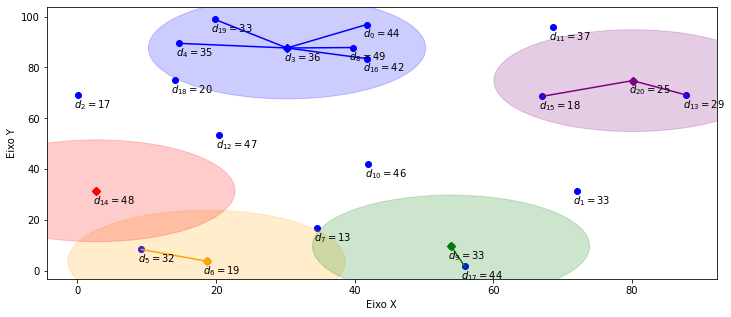

In [40]:
# grafico da solução

plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

for i in range(len(X)):
    plt.annotate('$d_{%d} = %d$' %(i,demanda[i]), (X[i]-0.5, Y[i]-5))
              
for n in localizacoes_ativas:
    plt.scatter(X[n],Y[n], 
                color=Color[localizacoes_ativas.index(n)],
                marker='D')
    
    for k in range(len(vertices)):
        if a[(n,vertices[k])]==1:
            i = vertices[k]
            j = n
            plt.plot([X[i],X[j]],
                     [Y[i],Y[j]],
                     color=Color[localizacoes_ativas.index(j)]
            )

ax = plt.gca()
for c in localizacoes_ativas:
    circule = plt.Circle((X[c],Y[c]), 
                         max_cov, 
                         color=Color[localizacoes_ativas.index(c)], 
                         alpha = 0.2
                        )
    ax.add_artist(circule)

plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.show()